In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
trainData = pd.read_csv('/content/train.csv')
testData = pd.read_csv('/content/test.csv')

In [ ]:
trainData.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

([<matplotlib.patches.Wedge at 0x7fb635171518>,
 [Text(-0.6222201925441275, 0.9071064061014833, 'STANDING'),
  Text(-1.0819949389085424, -0.1982093645020324, 'SITTING'),
  Text(-0.2753068363139765, -1.0649911482631156, 'LAYING'),
  Text(0.8322192907525442, -0.7193129027755114, 'WALKING'),
  Text(1.0704135811828486, 0.253406324347498, 'WALKING_DOWNSTAIRS'),
  Text(0.4868689286112144, 0.9863866616864649, 'WALKING_UPSTAIRS')])

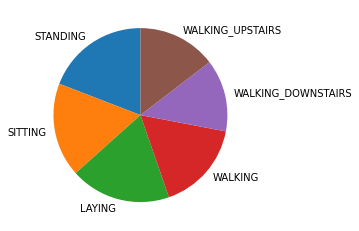

In [ ]:
plt.pie(trainData.groupby('Activity')['Activity'].count(),labels=trainData['Activity'].unique(),startangle=90)

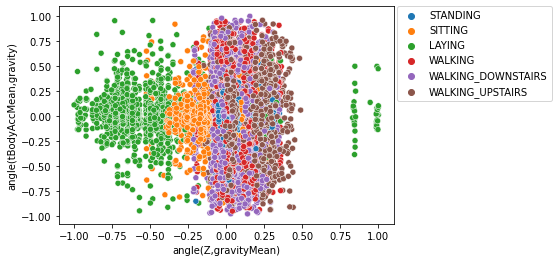

In [ ]:
ax = sns.scatterplot(x='angle(Z,gravityMean)',y='angle(tBodyAccMean,gravity)',hue='Activity',data=trainData)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

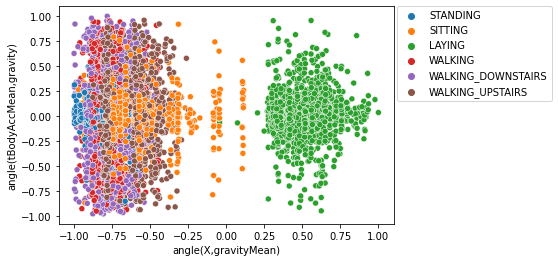

In [ ]:
ax = sns.scatterplot(x='angle(X,gravityMean)',y='angle(tBodyAccMean,gravity)',hue='Activity',data=trainData)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# above we observed that if XgravityMean > 0 then the activity most likely be laying
# trainData.info() shows that feature are already float data type so plotting operation can be applied on them

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
trainData['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
trainData.groupby('Activity')['Activity'].count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


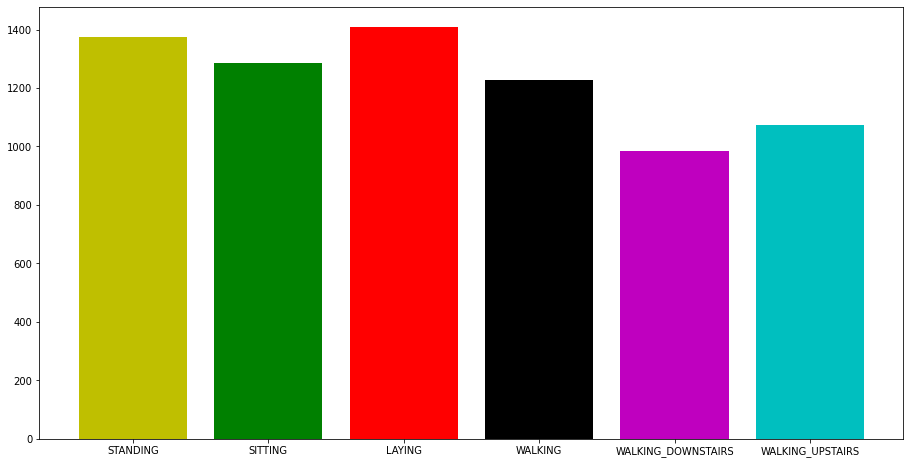

In [ ]:
fig = plt.figure(figsize = (12, 6)) 
ax = fig.add_axes([0,0,1,1])
activity = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
count = [1374,1286,1407,1226,986,1073]
my_colors = 'ygrkmc'
ax.bar(activity , count ,color=my_colors)
plt.show()

In [ ]:
trainData.shape

(7352, 563)

In [ ]:
testData.shape

(2947, 563)

In [ ]:
trainData = trainData.sample(frac = 1)

In [ ]:
trainData.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
6609,0.253287,-0.019407,-0.163259,-0.268935,-0.125074,-0.327630,-0.320527,-0.179490,-0.336961,0.138728,-0.157102,-0.400192,0.272657,0.022296,0.434154,-0.209780,-0.731361,-0.851488,-0.789734,-0.460152,-0.359550,-0.464305,0.464513,0.143043,0.140619,-0.360299,0.348346,-0.298785,0.230862,0.001458,-0.089395,0.402683,-0.297730,-0.104419,-0.017250,0.150889,-0.072007,-0.419210,-0.325120,-0.133819,...,0.356244,-0.904762,0.134239,-0.462711,-0.771859,-0.555181,-0.530678,-0.478870,-0.554294,-0.815308,-0.555181,-0.867718,-0.507809,0.412131,-0.846154,-0.120483,-0.312658,-0.621464,-0.671741,-0.693949,-0.658530,-0.743009,-0.921280,-0.671741,-0.945162,-0.666381,0.304338,-0.904762,-0.028307,-0.392197,-0.747373,-0.034108,0.478475,0.882001,-0.360865,-0.544087,0.327879,0.233957,28,WALKING_UPSTAIRS
5053,0.331236,-0.028782,-0.107905,-0.288768,0.030583,0.125093,-0.365553,-0.021085,0.135924,0.171436,0.158811,-0.141676,0.129239,0.151897,0.161195,-0.059882,-0.745188,-0.794418,-0.434759,-0.531644,-0.322987,0.140876,0.246900,0.195590,0.188714,-0.478032,0.457645,-0.320084,0.190554,-0.251868,0.174419,0.076323,-0.030907,-0.580152,0.543575,-0.349523,0.003798,-0.312114,-0.288296,0.324142,...,0.451737,-0.904762,-0.057842,-0.319995,-0.712107,-0.282544,-0.494057,-0.385109,-0.584382,-0.804856,-0.282544,-0.776185,-0.332434,0.708956,-0.846154,0.314183,-0.610926,-0.860407,-0.422173,-0.514321,-0.459491,-0.596206,-0.444082,-0.422173,-0.844096,-0.496174,0.489045,-0.936508,0.045537,-0.367262,-0.751512,-0.692940,0.291586,0.251413,0.848817,-0.543780,0.247174,0.302769,23,WALKING_UPSTAIRS
953,0.498177,0.031392,-0.060886,0.323976,0.122073,-0.397238,0.258015,0.042197,-0.387057,0.531287,0.189490,-0.312079,-0.041461,0.045613,0.467499,0.159017,-0.114162,-0.752727,-0.830371,0.120856,-0.238925,-0.416956,0.358115,0.449125,0.256673,-0.276872,0.128774,-0.139299,0.404606,-0.387397,0.420237,-0.119164,0.200250,-0.209113,0.217708,-0.092929,0.027466,-0.218442,0.074432,0.454066,...,0.457758,-0.873016,0.156904,-0.312169,-0.669166,0.004809,-0.184105,-0.042501,-0.306377,-0.470293,0.004809,-0.501106,-0.052825,0.7

In [ ]:
# seperating labels from features

X_train=trainData.iloc[:,:-2]
y_train=trainData.iloc[:,-1]

X_test=testData.iloc[:,:-2]
y_test=testData.iloc[:,-1]

In [ ]:
X_train.shape

(7352, 561)

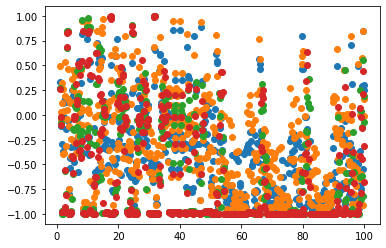

In [ ]:
plt.scatter(np.linspace(1,100,561),X_train.iloc[1].values)
plt.scatter(np.linspace(1,100,561),X_train.iloc[2].values)
plt.scatter(np.linspace(1,100,561),X_train.iloc[3].values)
plt.scatter(np.linspace(1,100,561),X_train.iloc[4].values)
plt.show()

In [ ]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
6609,0.253287,-0.019407,-0.163259,-0.268935,-0.125074,-0.327630,-0.320527,-0.179490,-0.336961,0.138728,-0.157102,-0.400192,0.272657,0.022296,0.434154,-0.209780,-0.731361,-0.851488,-0.789734,-0.460152,-0.359550,-0.464305,0.464513,0.143043,0.140619,-0.360299,0.348346,-0.298785,0.230862,0.001458,-0.089395,0.402683,-0.297730,-0.104419,-0.017250,0.150889,-0.072007,-0.419210,-0.325120,-0.133819,...,-0.758224,-0.366389,0.356244,-0.904762,0.134239,-0.462711,-0.771859,-0.555181,-0.530678,-0.478870,-0.554294,-0.815308,-0.555181,-0.867718,-0.507809,0.412131,-0.846154,-0.120483,-0.312658,-0.621464,-0.671741,-0.693949,-0.658530,-0.743009,-0.921280,-0.671741,-0.945162,-0.666381,0.304338,-0.904762,-0.028307,-0.392197,-0.747373,-0.034108,0.478475,0.882001,-0.360865,-0.544087,0.327879,0.233957
5053,0.331236,-0.028782,-0.107905,-0.288768,0.030583,0.125093,-0.365553,-0.021085,0.135924,0.171436,0.158811,-0.141676,0.129239,0.151897,0.161195,-0.059882,-0.745188,-0.794418,-0.434759,-0.531644,-0.322987,0.140876,0.246900,0.195590,0.188714,-0.478032,0.457645,-0.320084,0.190554,-0.251868,0.174419,0.076323,-0.030907,-0.580152,0.543575,-0.349523,0.003798,-0.312114,-0.288296,0.324142,...,-0.687606,-0.232136,0.451737,-0.904762,-0.057842,-0.319995,-0.712107,-0.282544,-0.494057,-0.385109,-0.584382,-0.804856,-0.282544,-0.776185,-0.332434,0.708956,-0.846154,0.314183,-0.610926,-0.860407,-0.422173,-0.514321,-0.459491,-0.596206,-0.444082,-0.422173,-0.844096,-0.496174,0.489045,-0.936508,0.045537,-0.367262,-0.751512,-0.692940,0.291586,0.251413,0.848817,-0.543780,0.247174,0.302769
953,0.498177,0.031392,-0.060886,0.323976,0.122073,-0.397238,0.258015,0.042197,-0.387057,0.531287,0.189490,-0.312079,-0.041461,0.045613,0.467499,0.159017,-0.114162,-0.752727,-0.830371,0.120856,-0.238925,-0.416956,0.358115,0.449125,0.256673,-0.276872,0.128774,-0.139299,0.404606,-0.387397,0.420237,-0.119164,0.200250,-0.209113,0.217708,-0.092929,0.027466,-0.218442,0.074432,0.454066,...,-0.553707,-0.308415,0.457758,-0.873016,0.156904,-0.312169,-0.669166,0.004809,-0.184105,-0.0

In [ ]:
y_train

6609      WALKING_UPSTAIRS
5053      WALKING_UPSTAIRS
953     WALKING_DOWNSTAIRS
3813              STANDING
6369                LAYING
               ...        
7057                LAYING
3092               SITTING
6529                LAYING
2782                LAYING
6906               WALKING
Name: Activity, Length: 7352, dtype: object

In [ ]:
X_train.shape

(7352, 561)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [ ]:
y_train

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
y_train.shape

(7352, 6)

In [ ]:
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)

In [ ]:
r_test = y_test

In [ ]:
y_test=pd.get_dummies(y_test).values
y_test

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
# model creation

model=Sequential()

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                17984     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 39,494
Trainable params: 39,494
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=256,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
29/29 [==============================] - 1s 24ms/step - loss: 1.7028 - accuracy: 0.2266 - val_loss: 1.1029 - val_accuracy: 0.4903
Epoch 2/20
29/29 [==============================] - 0s 6ms/step - loss: 1.0211 - accuracy: 0.5121 - val_loss: 0.8302 - val_accuracy: 0.6135
Epoch 3/20
29/29 [==============================] - 0s 6ms/step - loss: 0.7074 - accuracy: 0.6567 - val_loss: 0.6444 - val_accuracy: 0.7085
Epoch 4/20
29/29 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7242 - val_loss: 0.5221 - val_accuracy: 0.7292
Epoch 5/20
29/29 [==============================] - 0s 6ms/step - loss: 0.4558 - accuracy: 0.7990 - val_loss: 0.4219 - val_accuracy: 0.8426
Epoch 6/20
29/29 [==============================] - 0s 6ms/step - loss: 0.3317 - accuracy: 0.8674 - val_loss: 0.3152 - val_accuracy: 0.8812
Epoch 7/20
29/29 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9100 - val_loss: 0.2569 - val_accuracy: 0.8955
Epoch 8/20
29/29 [=

In [ ]:
import matplotlib.pyplot as plt

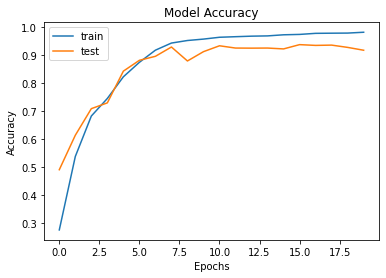

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

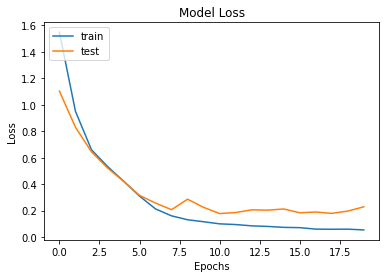

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
r_test.shape

(2947,)

In [ ]:
y_pred.shape

(2947,)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5f92fc630>)

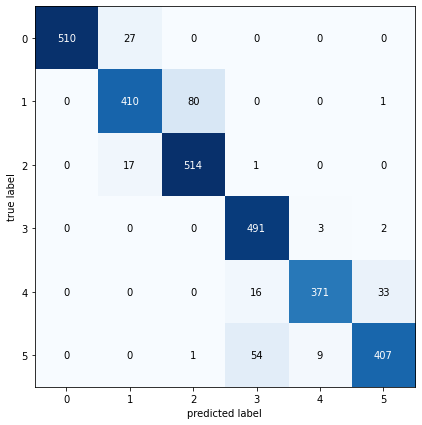

In [ ]:
mat = confusion_matrix(r_test , y_pred )
plot_confusion_matrix(conf_mat = mat, show_normed=False , figsize=(7,7))

In [ ]:
print(mat)

[[510  27   0   0   0   0]
 [  0 410  80   0   0   1]
 [  0  17 514   1   0   0]
 [  0   0   0 491   3   2]
 [  0   0   0  16 371  33]
 [  0   0   1  54   9 407]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(r_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(r_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(r_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(r_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(r_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(r_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(r_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(r_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(r_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(r_test, y_pred, average='weighted')))


Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.91
Macro F1-score: 0.92

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(r_test, y_pred, target_names=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']))


Classification Report

                    precision    recall  f1-score   support

          STANDING       1.00      0.95      0.97       537
           SITTING       0.90      0.84      0.87       491
            LAYING       0.86      0.97      0.91       532
           WALKING       0.87      0.99      0.93       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.92      0.86      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [ ]:
testData.groupby('Activity')['Activity'].count()

Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
Name: Activity, dtype: int64